## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_and_study_df = pd.merge(mouse_metadata, study_results, how = "outer", on="Mouse ID")
combined_mouse_and_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_mouse_and_study_df.nunique()

Mouse ID                249
Drug Regimen             10
Sex                       2
Age_months               24
Weight (g)               16
Timepoint                10
Tumour Volume (mm3)    1644
Metastatic Sites          5
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_and_study_df.duplicated(subset=["Mouse ID", "Timepoint"]).sum()


5

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_mouse_and_study_df.loc[combined_mouse_and_study_df.duplicated(subset=["Mouse ID", "Timepoint"]), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_and_study_df = combined_mouse_and_study_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
combined_mouse_and_study_df = combined_mouse_and_study_df.reset_index()

In [6]:
# Checking the number of mice in the clean DataFrame.
combined_mouse_and_study_df.count()

index                  1888
Mouse ID               1888
Drug Regimen           1888
Sex                    1888
Age_months             1888
Weight (g)             1888
Timepoint              1888
Tumour Volume (mm3)    1888
Metastatic Sites       1888
dtype: int64

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
combined_mouse_and_study_df_groupby = combined_mouse_and_study_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
mean_table = combined_mouse_and_study_df_groupby["Tumour Volume (mm3)"].mean()
median_table = combined_mouse_and_study_df_groupby["Tumour Volume (mm3)"].median()
var_table = combined_mouse_and_study_df_groupby["Tumour Volume (mm3)"].var()
std_table = combined_mouse_and_study_df_groupby["Tumour Volume (mm3)"].std()
sem_table = combined_mouse_and_study_df_groupby["Tumour Volume (mm3)"].sem()


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

combined_mouse_and_study_df_groupby_regimen = pd.DataFrame({
    "Tumour Volume mean": mean_table,
    "Tumour Volume median": median_table,
    "Tumour Volume variance":var_table,
    "Tumour Volume std": std_table,
    "Tumour Volume SEM": sem_table
})
combined_mouse_and_study_df_groupby_regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_groupby = combined_mouse_and_study_df.groupby("Drug Regimen").agg({"Tumour Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_groupby
combined_mouse_and_study_df_groupby_regimen

,Tumour Volume mean,Tumour Volume median,Tumour Volume variance,Tumour Volume std,Tumour Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_groupby = combined_mouse_and_study_df.groupby("Drug Regimen").agg({"Tumour Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_groupby

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Numbers of mice')

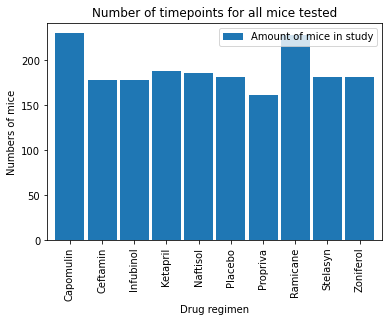

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_count_drug_regimen_count = combined_mouse_and_study_df.groupby("Drug Regimen")["Sex"].count()
timepoint_count_drug_regimen_count_df = pd.DataFrame ({
    "Amount of mice in study" : timepoint_count_drug_regimen_count
})
timepoint_count_drug_regimen_count_df

pandas_bar_chart = timepoint_count_drug_regimen_count_df.plot.bar(width=0.9)
pandas_bar_chart.set_title("Number of timepoints for all mice tested")
pandas_bar_chart.set_xlabel("Drug regimen")
pandas_bar_chart.set_ylabel("Numbers of mice")



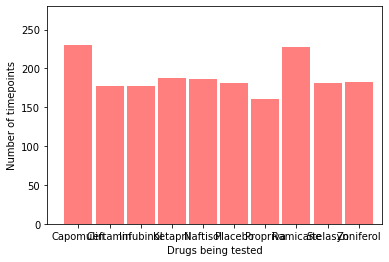

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
amount_of_mice = timepoint_count_drug_regimen_count_df["Amount of mice in study"]


x_axis = np.arange(len(amount_of_mice))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.bar(x_axis, amount_of_mice, color = "r", alpha = 0.5, align = "center", width=0.9,  )
plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(amount_of_mice)+50)
plt.xlabel("Drugs being tested")
plt.ylabel("Number of timepoints")
# plt.title("Number of timepoints for all mice tested")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

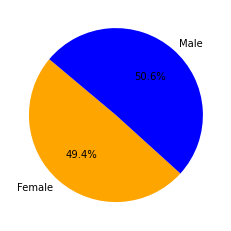

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = combined_mouse_and_study_df.groupby("Sex").count()
male_v_female
female_numbers = male_v_female.iat[0,0]

male_numbers = male_v_female.iat[1,0]
size=[female_numbers, male_numbers]

male_v_female["Mouse ID"]
labels = ["Female", "Male"]
colours = ["orange", "blue"]
plt.pie(size, labels=labels, colors=colours, autopct="%1.1f%%", startangle=140)
# plt.title("Amount of male and female mice")
plt.show

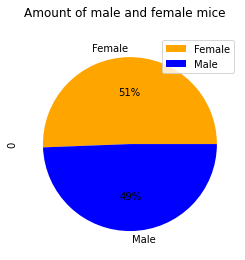

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colours =["orange", "blue"]
labels = ["Female", "Male"]
male_v_female_pandas = pd.DataFrame({female_numbers, male_numbers})
plot = male_v_female_pandas.plot.pie(subplots=True, colors=colours, autopct='%1.0f%%', labels=labels, title = "Amount of male and female mice" )

## Quartiles, Outliers and Boxplots

In [35]:
# Find max timepoint for each mouse

max_tp_df = pd.DataFrame(combined_mouse_and_study_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Merge max timepoint onto data_df
merged_df = pd.merge(combined_mouse_and_study_df, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [39]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Create subset dataframe representing only the four following drug regimens
# ***NOTE*** must run previous cells in order for this cell to work

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumour Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumour Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumour Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


TypeError: 'str' object is not callable

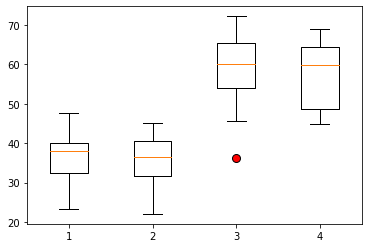

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# ***NOTE*** must run previous cells in order for this cell to work

# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumour Volume by Drug')
plt.ylabel('Final Tumour Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

TypeError: 'str' object is not callable

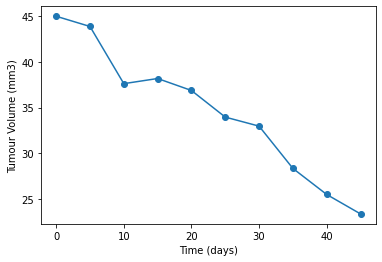

In [44]:
# Identify data points of a mouse treated with Capomulin
mouse = combined_mouse_and_study_df.loc[combined_mouse_and_study_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumour Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

TypeError: 'str' object is not callable

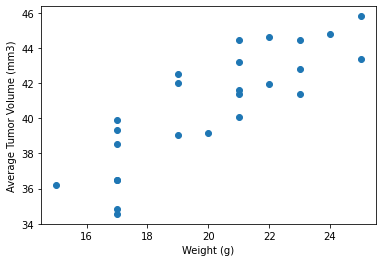

In [46]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = combined_mouse_and_study_df.loc[combined_mouse_and_study_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumour Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumour Volume (mm3)': 'avg_tumour_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumour_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumour_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title('Average Tumour Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
capomulin_weight_volume = combined_mouse_and_study_df.loc[combined_mouse_and_study_df["Drug Regimen"] == "Capomulin"]
correlation_linear_weight = capomulin_weight_volume.iloc[:,5]
correlation_linear_volume = capomulin_weight_volume.iloc[:,7]
correlation = st.pearsonr(correlation_linear_weight, correlation_linear_volume)
print(f"The correlation between weight and volume is {round(correlation[0],2)}")

The correlation between weight and volume is 0.58


<function matplotlib.pyplot.show(*args, **kw)>

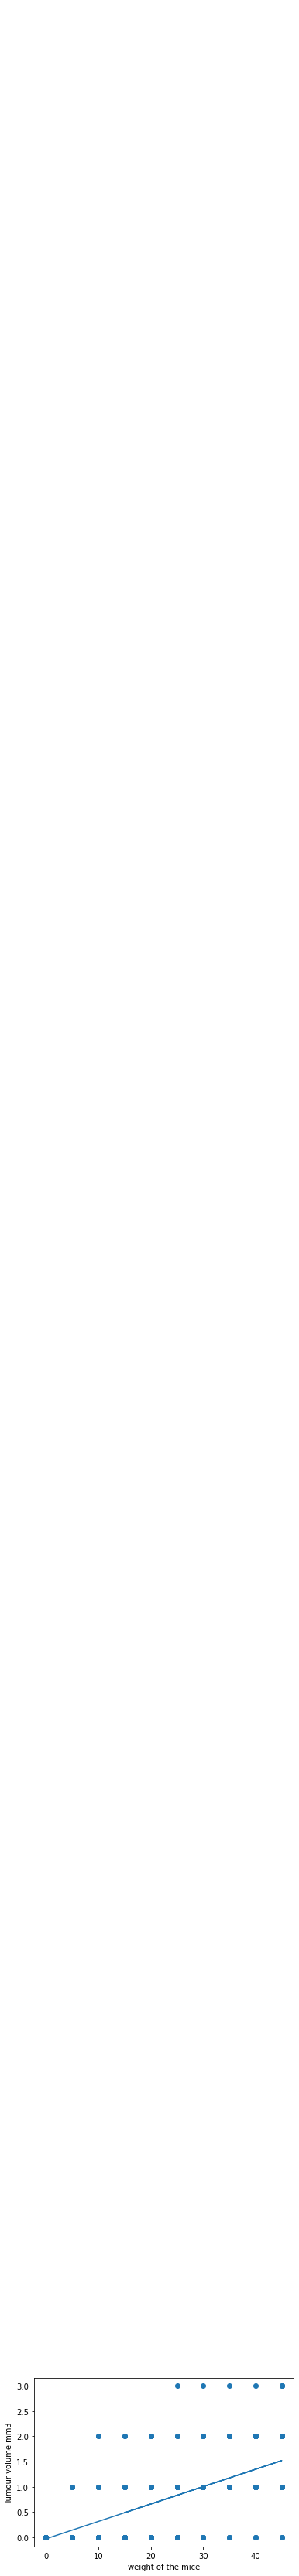

In [48]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(correlation_linear_weight, correlation_linear_volume)
regress_values = correlation_linear_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(correlation_linear_weight, correlation_linear_volume)
plt.plot(correlation_linear_weight, regress_values)
plt.annotate(line_eq,(0,50),fontsize=15, color="red")
plt.xlabel("weight of the mice")
plt.ylabel("Tumour volume mm3")
plt.show

Findings

1-I analysed the data from a randomly selected mouse, comparing the tumour volume against the timepoint. It was clear that over time, the tumour volume increased at an relatively steady rate.B

2-When performing the correlation between weight and volume for mice using the Capomulin drug, it returned a correlation of 0.53. This figure just falls into the category of having moderate strength.

3-The drugs used on the mice were not evenly spread. There seems to be a big variance between the drug used on the most number of mice, in comparison to the drug used on the least amount of mice. I feel this uneven spread of the drugs used may not give accurate data.